In [62]:
from src.FunctionsSurface import *
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm  # Import LogNorm

In [ ]:
N = 5000
dim = [1,2,3,4]
for i in dim:
    parms =  [k for k in list_all_folders(N,i)]
    for l in range(len(parms)):
        all_properties_dataframe(N, i, parms[l][0], parms[l][1])

In [ ]:
N = 5000
dim = [1,2,3,4]
for i in dim:
    parms =  [k for k in list_all_folders(N,i)]
    for l in range(len(parms)):
        copy_files_cleber(N, i, parms[l][0], parms[l][1])

In [ ]:
alpha_a = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
alpha_g = [0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

for n in N__:
    for d in dim:
        for g in alpha_g:
            for a in alpha_a:
                alpha_G = list_all_folders_for_alpha_fixed(n, d , a, g, alpha_g_variable=True)
                create_all_properties_file(n, d, a, alpha_G, alpha_g_variable=True)

    for d in dim:
        for a in alpha_a:
            for g in alpha_g:
                alpha_A = list_all_folders_for_alpha_fixed(n, d , a, g, alpha_g_variable=False)
                create_all_properties_file(n, d, alpha_A, g, alpha_g_variable=False)

In [58]:
data = pd.read_csv("../../data/all_data.csv",sep=',')
all_data =  filter_dataframe(data)
all_data.head()

/media/junior/home/TsallisNetwork/scripts/jupyter/src/FunctionsSurface.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, mask_alpha_a], ignore_index=True)


,alpha_a,short_mean,diameter_mean,ass_coeff_mean,short_err,diameter_err,ass_coeff_err,n_samples,alpha_g,n_size,dim
0,0.0,8.600663,22.411765,-0.078314,0.071317,0.222599,0.002194,51,7.0,5000,2
1,0.0,8.651289,22.764706,-0.077356,0.067660,0.249844,0.002323,51,1.0,5000,2
2,0.0,8.591157,22.588235,-0.077048,0.066238,0.215437,0.002107,51,3.0,5000,2
3,0.0,8.585387,22.647059,-0.076851,0.071406,0.220202,0.002845,51,8.0,5000,2
4,0.0,8.590505,22.588235,-0.074847,0.071458,0.229537,0.002098,51,6.0,5000,2


In [ ]:
all_data["n_size"].unique()

In [ ]:
df__ = assortativity_N(all_data, [5000, 10000, 20000, 40000])

In [ ]:
median = []
avarage = []
for i in [1,2,3,4]:
    order = [find_order_of_magnitude(i) for i in df__[df__['dim']  == i ]["N*"].values]
    median.append(np.median(sorted(order)))
    avarage.append(np.mean(order))
    plt.hist(order,label=f'dim = {i}', alpha = 0.3, edgecolor='black')
print("median =",median)
print("mean = ",avarage)
plt.xlabel("Order of magnitude N*")
plt.legend()
plt.show()

In [59]:
for dim in [1,2,3,4]:
        data = {'x': df__[df__["dim"] == dim]["alpha_a"].values,
                'y': df__[df__["dim"] == dim]["alpha_g"].values,
                'z': np.log10(df__[df__["dim"] == dim]["N*"].values)}

        df_ = pd.DataFrame(data)

        df_ = df_.sort_values(by='y')

        # Pivot the DataFrame to prepare for heatmap
        pivot_df = df_.pivot(index='y', columns='x', values='z')

        # Plotting the heatmap
        #ax = sns.heatmap(pivot_df, cmap='coolwarm', norm=LogNorm())
        ax = sns.heatmap(pivot_df, cmap='coolwarm', yticklabels=sorted(df_['y'].unique()))
        cbar = ax.collections[0].colorbar
        cbar.set_label(r"$\log_{10} N^*$", fontsize=18)

        # Adding title and labels
        plt.title(f'Dimension = {dim}')
        plt.xlabel(r'$\alpha_a$',fontsize=18)
        plt.ylabel(r'$\alpha_g$',fontsize=18)

        # Display the plot
        plt.show()

NameError: name 'df__' is not defined

In [60]:
all_data_filter = filter_dataframe(all_data)
all_data_filter.head()

/media/junior/home/TsallisNetwork/scripts/jupyter/src/FunctionsSurface.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, mask_alpha_a], ignore_index=True)


,alpha_a,short_mean,diameter_mean,ass_coeff_mean,short_err,diameter_err,ass_coeff_err,n_samples,alpha_g,n_size,dim
0,0.0,8.600663,22.411765,-0.078314,0.071317,0.222599,0.002194,51,7.0,5000,2
1,0.0,8.651289,22.764706,-0.077356,0.067660,0.249844,0.002323,51,1.0,5000,2
2,0.0,8.591157,22.588235,-0.077048,0.066238,0.215437,0.002107,51,3.0,5000,2
3,0.0,8.585387,22.647059,-0.076851,0.071406,0.220202,0.002845,51,8.0,5000,2
4,0.0,8.590505,22.588235,-0.074847,0.071458,0.229537,0.002098,51,6.0,5000,2


In [ ]:
List_N = [5000, 10000, 20000, 40000]
df = beta_all(all_data_filter, List_N)
df.head()

In [61]:
df_1d = df[df["dim"]==1]
df_2d = df[df["dim"]==2]
df_3d = df[df["dim"]==3]
df_4d = df[df["dim"]==4]

NameError: name 'df' is not defined

In [65]:
def heatmap(dataframe, propertie = "beta_short", label_prop = r'$\beta_\ell$' ,dim = 1):
        # Example DataFrame with x, y, z values
        
        data = {'x': dataframe[dataframe["dim"] == dim]["alpha_a"].values,
                'y': dataframe[dataframe["dim"] == dim]["alpha_g"].values,
                'z': dataframe[dataframe["dim"] == dim][propertie].values}

        df_ = pd.DataFrame(data)
        
        df_ = df_.sort_values(by='y')
        
        # Pivot the DataFrame to prepare for heatmap
        pivot_df = df_.pivot(index='y', columns='x', values='z')
        
        # Plotting the heatmap
        #ax = sns.heatmap(pivot_df, cmap='coolwarm', norm=LogNorm())
        ax = sns.heatmap(pivot_df, cmap='coolwarm', yticklabels=sorted(df_['y'].unique()))
        cbar = ax.collections[0].colorbar
        cbar.set_label(label_prop, fontsize=18)
        
        # Adding title and labels
        plt.title(f'Dimension = {dim}')
        plt.xlabel(r'$\alpha_a$',fontsize=18)
        plt.ylabel(r'$\alpha_g$',fontsize=18)

        # Display the plot
        plt.show()

In [ ]:
for d in [1,2,3,4]:
    heatmap(df,  dim = d)

In [63]:
df_ = pd.read_csv("../../data/data_5000.csv", delimiter=',')
df_ = df_.sort_values(by=['alpha_a','alpha_g'])
df_

,alpha_a,alpha_g,n_size,dim,short_mean,diameter_mean,ass_coeff_mean,short_err,diameter_err,ass_coeff_err,n_samples
8243,0.0,0.1,5000,4,8.629317,22.356436,-0.076858,0.045938,0.160805,0.001401,101
18444,0.0,0.1,5000,3,8.561289,22.316832,-0.075240,0.056575,0.185585,0.001545,101
28645,0.0,0.1,5000,1,8.588431,22.782178,-0.075393,0.051326,0.191194,0.001578,101
38846,0.0,0.1,5000,2,8.618286,22.633663,-0.076032,0.050689,0.167523,0.001569,101
6453,0.0,0.2,5000,4,8.575447,22.366337,-0.076284,0.052182,0.162116,0.001484,101
...,...,...,...,...,...,...,...,...,...,...,...
34177,10.0,10.0,5000,2,15.485299,34.980198,-0.020171,0.076094,0.223819,0.001208,101
1233,10.0,10.1,5000,4,12.518766,29.465347,-0.059513,0.051336,0.184318,0.001532,101
11434,10.0,10.1,5000,3,13.682984,30.950495,-0.052007,0.055839,0.187942,0.001292,101
21635,10.0,10.1,5000,1,17.011697,39.920792,0.048939,0.185845,0.518697,0.001050,101


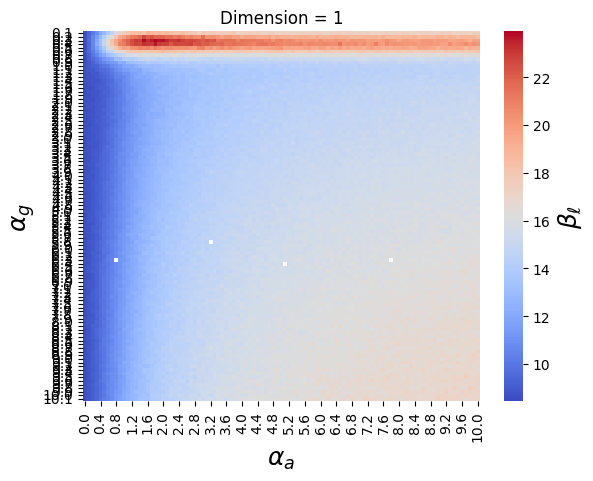

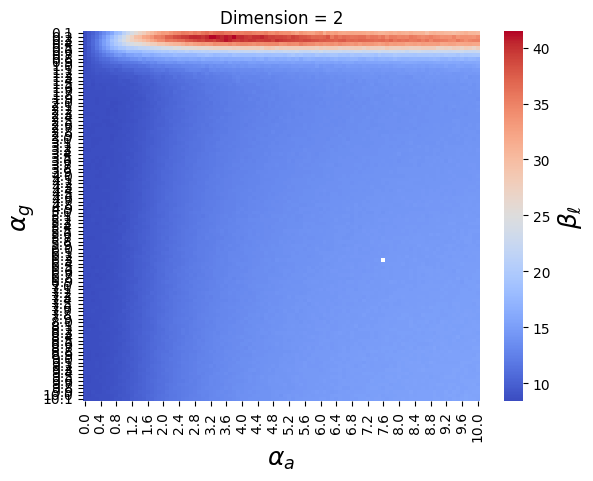

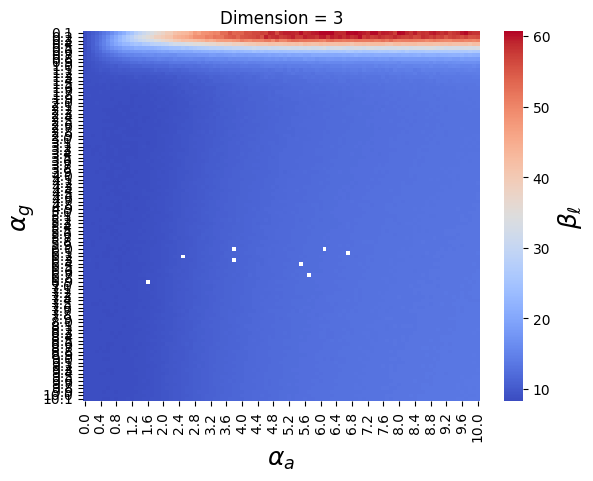

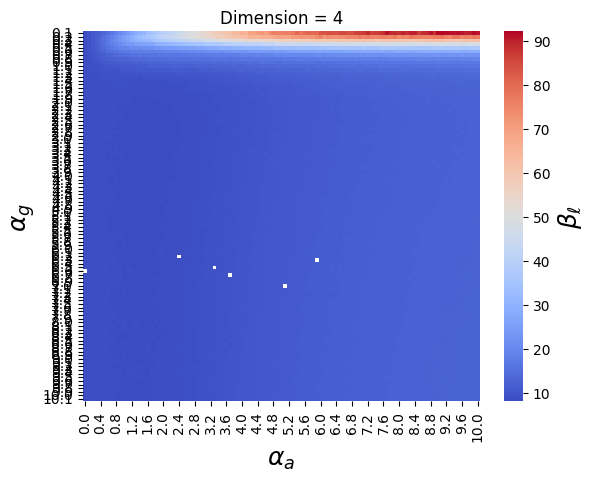

In [67]:
for d in [1,2,3,4]:
    heatmap(df_, propertie = "short_mean", label_prop = r'$\beta_\ell$' ,dim = d)

In [73]:
t = pd.read_csv("../../data/N_5000/dim_3/alpha_a_16.0_alpha_g_2.0/prop/properties_set.txt", sep=' ')
t['#ass_coeff'].mean()

0.004809416792079208

In [96]:
alpha_a_1 = np.arange(0.0,10.1,0.1)
alpha_g_1 = np.arange(10.1,16.2,0.6)

alpha_a_2 = np.arange(10.0,16.1,0.5)
alpha_g_2 = np.arange(0.1,10.2,0.5)

n = len(alpha_g_1)*len(alpha_a_1) + len(alpha_g_2)*len(alpha_a_2)
n_s = n*100
n, n_s

(702, 70200)

In [140]:
t = pd.read_csv("../../data/N_5000/dim_4/alpha_a_14.0_alpha_g_2.0/prop/properties_set.txt",sep=' ')
t["#ass_coeff"].mean()

0.002170010831683168

In [167]:
alpha_a_1 = np.round(np.arange(0.0, 10.1, 0.1),2)
alpha_g_1 = np.round(np.arange(0.1, 10.2, 0.1),2)

alpha_g_2 = np.round(np.arange(10.1,15.5,0.6),2)
alpha_a_2 = np.round(np.arange(10.0,15.4,0.6),2)
R_2, R_3, R_4 = [],[],[]

    
for j in range(len(alpha_g_2)):
    for i in range(len(alpha_a_1)):
        R_2.append((alpha_a_1[i],alpha_g_2[j]))

for j in range(len(alpha_a_2)):
    for i in range(len(alpha_g_1)):
        R_4.append((alpha_a_2[j],alpha_g_1[i]))

for i in range(len(alpha_a_2)):
    for j in range(len(alpha_g_2)):
        R_3.append((alpha_a_2[i],alpha_g_2[j]))

In [172]:
R_T = R_2 + R_3 + R_4

In [183]:
alpha_a = [R_T[i][0] for i in range(len(R_T))]
alpha_g = [R_T[i][1] for i in range(len(R_T))]
dict_3d = {"alpha_a":alpha_a, "alpha_g":alpha_g, "dim":[int(3*i) for i in np.ones(len(alpha_a))]}
dict_4d = {"alpha_a":alpha_a, "alpha_g":alpha_g, "dim":[int(4*i) for i in np.ones(len(alpha_a))]}

In [188]:
len(dict_3d['alpha_a'])

2120

In [184]:
df_3d = pd.DataFrame(data=dict_3d)
df_4d = pd.DataFrame(data=dict_4d)

In [189]:
df_3d

,alpha_a,alpha_g,dim
0,0.0,10.1,3
1,0.1,10.1,3
2,0.2,10.1,3
3,0.3,10.1,3
4,0.4,10.1,3
...,...,...,...
2115,15.4,9.7,3
2116,15.4,9.8,3
2117,15.4,9.9,3
2118,15.4,10.0,3


In [199]:
result = pd.concat([df_3d, df_4d], axis=0)
result.to_csv("new_data.csv",index=False, sep = ',')

In [195]:
x = 10
(202*x+x**2)*4

8480

In [141]:
len(np.arange(0.0,10.1,0.1))

101

In [127]:
c = 2*(101*11)
t_s = 4
((c*t_s)/36)/24


10.287037037037036

In [94]:
# Mb
file_size = 80.0/(1024*1024)  + 243.6/1024  + 408/(1024*1024)
(file_size*n_s)/1024

374.36326548457146

In [6]:
df_1d = df_[df_['dim']==1]
df_1d

,alpha_a,alpha_g,n_size,dim,short_mean,diameter_mean,ass_coeff_mean,short_err,diameter_err,ass_coeff_err,n_samples
28645,0.0,0.1,5000,1,8.588431,22.782178,-0.075393,0.051326,0.191194,0.001578,101
26855,0.0,0.2,5000,1,8.680653,22.821782,-0.078417,0.054186,0.187424,0.001491,101
23356,0.0,0.3,5000,1,8.639993,22.633663,-0.077541,0.037260,0.124653,0.001187,202
22111,0.0,0.4,5000,1,8.619824,22.628713,-0.076403,0.035259,0.110877,0.001157,202
23886,0.0,0.5,5000,1,8.593521,22.707921,-0.076250,0.039261,0.138048,0.001198,202
...,...,...,...,...,...,...,...,...,...,...,...
30424,10.0,9.7,5000,1,16.856193,39.841584,0.047601,0.146040,0.455491,0.001228,101
28325,10.0,9.8,5000,1,16.921857,40.188119,0.047672,0.170248,0.527597,0.001138,101
22762,10.0,9.9,5000,1,17.157094,41.009901,0.046923,0.200657,0.580798,0.001107,101
23976,10.0,10.0,5000,1,16.939373,39.851485,0.048810,0.193078,0.542525,0.001046,101


In [36]:
z = df_1d[(df_1d['alpha_a'] == 0.0) & (df_1d['alpha_g'] == 0.1)]['short_mean']


28645    8.588431
Name: short_mean, dtype: float64

In [45]:
# Criação de dados de exemplo
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
xv, yv = np.meshgrid(x, y)
print(x.shape)

(100,)


In [54]:
x = df_1d['alpha_a'].unique()
y = df_1d['alpha_g'].unique()
xv, yv = np.meshgrid(x, y)
zv = np.zeros(xv.shape)
zv = [df_1d[(df_1d['alpha_a'] == xv[i]) & (df_1d['alpha_g'] == yv[i])]['short_mean'] for i in ]
#zv
yv.shape
#for i in range(len(x)):
    #for j in range(len(y)):
     #   zv[i][j] = df_1d[(df_1d['alpha_a'] == xv[i]) & (df_1d['alpha_g'] == yv[j])]['short_mean']
        

(101, 101)

In [56]:
len(zv)

101

ValueError: Argument Z must be 2-dimensional.

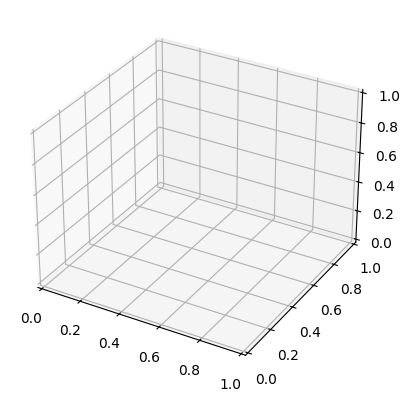

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Criação de dados de exemplo
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
#x, y = np.meshgrid(x, y)
z = [np.sin(np.sqrt(x**2 + y**2))]

# Criação do gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)

# Ajustes de visualização
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Exibição do gráfico
plt.show()


In [ ]:
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))
print((z))